In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# **Load the datasets**

In [ ]:
df = pd.read_csv("2-1024_drug_like_MorganFp_no_intermed.csv")
df

,molecule_chembl_id,canonical_smiles,type,units,value,activity,Bit_0,Bit_1,Bit_2,Bit_3,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,1.52,active,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,3.16,active,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,6.22,active,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,7.14,active,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O,IC50,uM,9.46,active,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,CHEMBL607576,COc1cc(CNc2ccc(C(=O)O)cc2)ccc1OCc1ccccc1Cl,IC50,uM,100.00,Inactive,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1300,CHEMBL607863,COc1ccc2c(c1)C(CC(=O)O)CN2Cc1ccccc1,IC50,uM,100.00,Inactive,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1301,CHEMBL63883,COc1ccc(NC(=O)c2cc3ccccc3cc2O)cc1,IC50,uM,100.00,Inactive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,CHEMBL66953,O=c1c(O)cccc2cc(O)c(O)c(O)c12,IC50,uM,12.19,active,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['activity'].value_counts()

Inactive    829
active      475
Name: activity, dtype: int64

**Select X and Y variables**

In [ ]:
X = df.iloc[:, 6:]
X

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['activity'].values)
y[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

## **Split the data**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, balanced_accuracy_score, matthews_corrcoef

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((1043, 1024), (261, 1024))

# **1. Random forest**

## **Model building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 1024
Rf = RandomForestClassifier(n_estimators=400, max_features='log2', max_depth= 50, min_samples_leaf=1, criterion='entropy', random_state=4)

In [ ]:
# 2048
#Rf = RandomForestClassifier(n_estimators=300, max_depth= 60, min_samples_leaf=2, criterion='entropy', random_state=4)

In [ ]:
Rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       n_estimators=400, random_state=4)

In [ ]:
preds_train = Rf.predict(X_train)
preds_Rf = Rf.predict(X_test)

In [ ]:
#labels back
class_le.inverse_transform(preds_Rf)[:10]

array(['Inactive', 'Inactive', 'Inactive', 'Inactive', 'Inactive',
       'Inactive', 'active', 'Inactive', 'Inactive', 'Inactive'],
      dtype=object)

In [ ]:
preds_Rf[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

## **Model evaluation**

In [ ]:
print('Confusion matrix: ','\n', confusion_matrix(y_test, preds_Rf))
print('\n')
print('Classification report', '\n', classification_report(y_test, preds_Rf))

Confusion matrix:  
 [[159   7]
 [ 30  65]]


Classification report 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       166
           1       0.90      0.68      0.78        95

    accuracy                           0.86       261
   macro avg       0.87      0.82      0.84       261
weighted avg       0.86      0.86      0.85       261



In [ ]:
# Test the model on the testing set
Rf_train_accuracy = Rf.score(X_train, y_train)
Rf_test_accuracy = Rf.score(X_test, y_test)

print("Training accuracy:", Rf_train_accuracy)
print("Testing accuracy:", Rf_test_accuracy)

Training accuracy: 0.9779482262703739
Testing accuracy: 0.8582375478927203


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, preds_Rf))
print("Matthews correlation coefficient (MCC):", matthews_corrcoef(y_test, preds_Rf))

Balanced accuracy: 0.8210209258084972
Matthews correlation coefficient (MCC): 0.6911654729690635


## **Hyperparameters tuning**

Stratified cross validation will be used to find the best parameters for the classifier

In [ ]:
grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', 200],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid=grid, cv=skf)

grid_search.fit(X, y)

best_rf = grid_search.best_estimator_

scores_rf = cross_val_score(best_rf, X, y, cv=skf)

print('Best parameters: ', grid_search.best_params_)

print('Cross-validation scores:', scores_rf)
print('Mean score:', np.mean(scores_rf))

print('Best score: ', grid_search.best_score_)

Best parameters:  {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 400}
Cross-validation scores: [0.81992337 0.8467433  0.89655172 0.86590038 0.82692308]
Mean score: 0.8512083701738874
Best score:  0.8527379899793692


## **ROC curve**

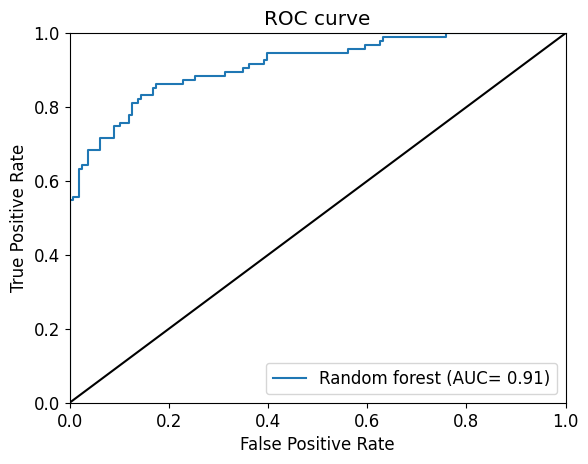

In [ ]:
y_pred_proba_Rf = Rf.predict_proba(X_test)[:,1]
fpr_Rf, tpr_Rf, thresholds_Rf = roc_curve(y_test, y_pred_proba_Rf)
auc_Rf = roc_auc_score(y_test, y_pred_proba_Rf)

plt.rc('font', size=12)
plt.plot(fpr_Rf, tpr_Rf, label='Random forest (AUC= %.2f)' % (auc_Rf))
plt.plot([0, 1], [0, 1],'k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# **Learning curve**

In [ ]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    Rf, X, y, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.rc('font', size=12)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend(loc='best')

## **Save the model**

In [ ]:
import pickle

with open('Rf_model.pkl', 'wb') as f:
    pickle.dump(Rf, f)

# Load the model from the uploaded file
# import pickle
# with open('/content/Rf_model.pkl', 'rb') as f:
#     model = pickle.load(f)

# **2. XGBoost models**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# 1024
xgb = XGBClassifier(n_estimators=200, max_depth=9, learning_rate= 0.5, min_child_weight=0)

In [ ]:
# 2048
#xgb = XGBClassifier(n_estimators=200, max_depth=9, learning_rate= 0.05)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
preds_xgb = xgb.predict(X_test)

In [ ]:
preds_xgb[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(confusion_matrix(y_test,preds_xgb))
print('\n')
print(classification_report(y_test,preds_xgb))

[[151  15]
 [ 28  67]]


              precision    recall  f1-score   support

           0       0.84      0.91      0.88       166
           1       0.82      0.71      0.76        95

    accuracy                           0.84       261
   macro avg       0.83      0.81      0.82       261
weighted avg       0.83      0.84      0.83       261



In [ ]:
# Test the model on the testing set
xgb_train_accuracy = xgb.score(X_train, y_train)
xgb_test_accuracy = xgb.score(X_test, y_test)

print("Training accuracy:", xgb_train_accuracy)
print("Testing accuracy:", xgb_test_accuracy)

Training accuracy: 0.9779482262703739
Testing accuracy: 0.8352490421455939


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, preds_xgb))
print("Matthews correlation coefficient (MCC):", matthews_corrcoef(y_test, preds_xgb))

Balanced accuracy: 0.8074508560558021
Matthews correlation coefficient (MCC): 0.637364847576887


## **Hyperparameters tuning**

In [ ]:
# NOTE: This cell takes ~6 hours
grid = {
    'max_depth': [5, 7, 9],
    'min_child_weight': [0, 1, 2, 3],
    'learning_rate': [0.01, 0.05, 0.3, 0.5],
    'n_estimators': [100, 200, 300]
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

xg = XGBClassifier()

grid_search = GridSearchCV(xg, param_grid=grid, cv=skf)
grid_search.fit(X, y)

best_xg = grid_search.best_estimator_

scores_xg = cross_val_score(best_xg, X, y, cv=skf)

print('Best parameters: ',grid_search.best_params_)
print('\n')
print('Cross-validation scores:', scores_xg)
print('\n')
print('Mean score:', np.mean(scores_xg))
print('\n')
print('Best score: ', grid_search.best_score_)

Best parameters:  {'learning_rate': 0.3, 'max_depth': 9, 'min_child_weight': 0, 'n_estimators': 300}


Cross-validation scores: [0.85823755 0.83141762 0.83524904 0.8697318  0.83846154]


Mean score: 0.8466195107574418


Best score:  0.8466195107574418


## **ROC curve**

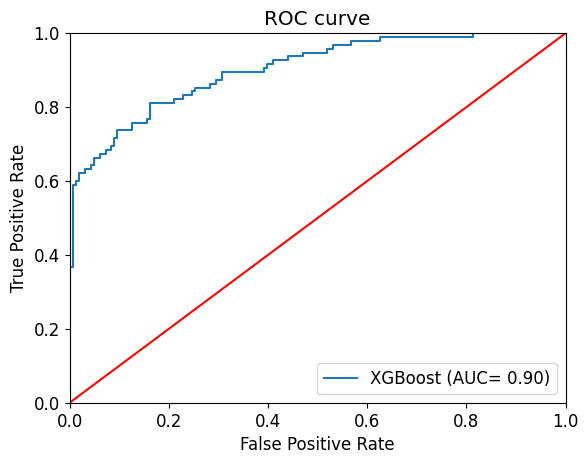

In [ ]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC= %.2f)' % (auc_xgb))
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# Add threshold point
# threshold_xgb = 0.34
# idx = np.min(np.where(tpr_xgb > threshold_xgb))
# plt.scatter(fpr_xgb[idx], tpr_xgb[idx], marker='o', color='black', label='Threshold')

In [ ]:
with open('XGB_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# **Leraning curve for Rf & XGB**

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([Rf, xgb]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

# **3. K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 1024
knn = KNeighborsClassifier(n_neighbors=3, algorithm ='kd_tree', leaf_size= 20, weights= 'uniform')

In [ ]:
# 2048
#knn = KNeighborsClassifier(n_neighbors=3, algorithm ='kd_tree', leaf_size= 10, weights= 'distance')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, n_neighbors=3)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred_knn))
print('\n')
print(classification_report(y_test,pred_knn))

[[147  19]
 [ 28  67]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       166
           1       0.78      0.71      0.74        95

    accuracy                           0.82       261
   macro avg       0.81      0.80      0.80       261
weighted avg       0.82      0.82      0.82       261



In [ ]:
# Test the model on the testing set
knn_train_accuracy = knn.score(X_train, y_train)
knn_test_accuracy = knn.score(X_test, y_test)

print("Training accuracy:", knn_train_accuracy)
print("Testing accuracy:", knn_test_accuracy)

Training accuracy: 0.8954937679769894
Testing accuracy: 0.8199233716475096


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, pred_knn))
print("Matthews correlation coefficient (MCC):", matthews_corrcoef(y_test, pred_knn))

Balanced accuracy: 0.7954026632847178
Matthews correlation coefficient (MCC): 0.6047724498708196


## **Hyperparameters tunning**

In [ ]:
grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)

kn = KNeighborsClassifier()

grid_search = GridSearchCV(kn, param_grid=grid, cv=skf)
grid_search.fit(X, y)

best_kn = grid_search.best_estimator_

scores_kn = cross_val_score(best_kn, X, y, cv=skf)

print('Best parameters: ',grid_search.best_params_)
print('\n')
print('Cross-validation scores:', scores_kn)
print('\n')
print('Mean score:', np.mean(scores_kn))
print('\n')
print('Best score: ', grid_search.best_score_)

Best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 3, 'weights': 'uniform'}


Cross-validation scores: [0.80916031 0.80916031 0.84732824 0.79389313 0.82307692 0.82307692
 0.83846154 0.85384615 0.81538462 0.83076923]


Mean score: 0.8244157369348208


Best score:  0.8244157369348208


## **ROC curve**

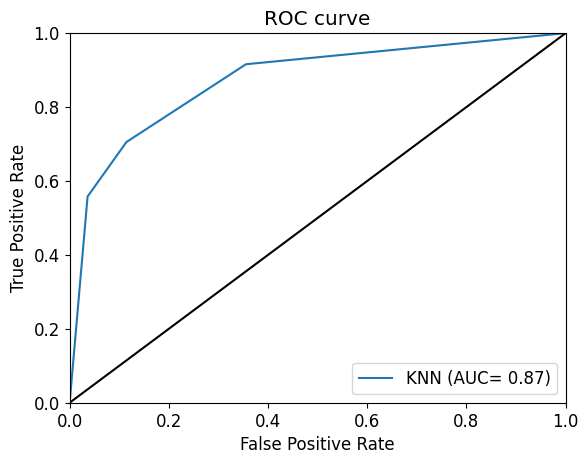

In [ ]:
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

plt.plot(fpr_knn, tpr_knn, label='KNN (AUC= %.2f)' % (auc_knn))
plt.plot([0, 1], [0, 1],'k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# **Learning curve for KNN**

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([knn]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
# Save the model
with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# **4. Support vector machines (SVM)**

In [ ]:
from sklearn.svm import SVC


In [ ]:
#1024
svm = SVC(C=5, kernel='rbf', probability=True, gamma='scale', random_state=10)

In [ ]:
# 2048
#svm = SVC(C=10, kernel='rbf', probability=True, gamma='scale', random_state=10)

In [ ]:
svm.fit(X_train,y_train)

SVC(C=5, probability=True, random_state=10)

In [ ]:
preds_svm = svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,preds_svm))
print('\n')
print(classification_report(y_test,preds_svm))

[[152  14]
 [ 26  69]]


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       166
           1       0.83      0.73      0.78        95

    accuracy                           0.85       261
   macro avg       0.84      0.82      0.83       261
weighted avg       0.85      0.85      0.84       261



In [ ]:
# Test the model on the testing set
svm_train_accuracy = svm.score(X_train, y_train)
svm_test_accuracy = svm.score(X_test, y_test)

print("Training accuracy:", svm_train_accuracy)
print("Testing accuracy:", svm_test_accuracy)

Training accuracy: 0.9779482262703739
Testing accuracy: 0.8467432950191571


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, preds_svm))
print("Matthews correlation coefficient (MCC):", matthews_corrcoef(y_test, preds_svm))

Balanced accuracy: 0.8209892200380469
Matthews correlation coefficient (MCC): 0.6632652473684647


# **Hyperparameter tuning**

gamma is not used with linear kernel

In [ ]:
# NOTE: This cell takes ~ 4 hours to complete in Google Colab.
grid = {
    'C': [0.1, 1, 5, 10, 15, 20],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1.0, 10.0, 'scale', 'auto']
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

sv = SVC()

grid_search = GridSearchCV(sv, param_grid=grid, cv=skf)
grid_search.fit(X, y)

best_sv = grid_search.best_estimator_

scores_sv = cross_val_score(best_sv, X, y, cv=skf)

print('Best parameters: ',grid_search.best_params_)
print('\n')
print('Cross-validation scores:', scores_sv)
print('\n')
print('Mean score:', np.mean(scores_sv))
print('\n')
print('Best score: ', grid_search.best_score_)

Best parameters:  {'C': 0.1, 'gamma': 1.0, 'kernel': 'poly'}


Cross-validation scores: [0.84291188 0.83141762 0.8467433  0.86206897 0.83846154]


Mean score: 0.844320660182729


Best score:  0.844320660182729


In [ ]:
with open('SVM_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

## **ROC curve**

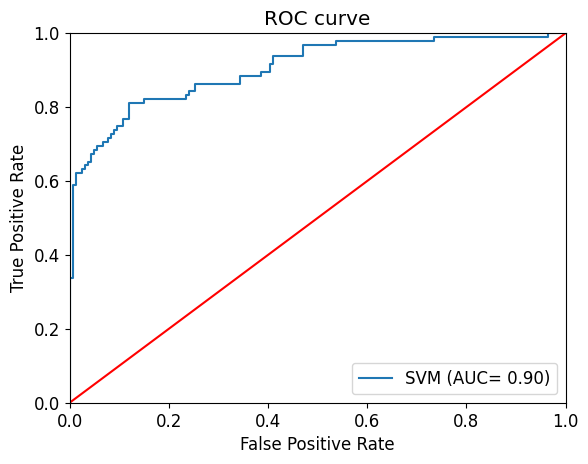

In [ ]:
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

plt.plot(fpr_svm, tpr_svm, label='SVM (AUC= %.2f)' % (auc_svm))
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# **5. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# var_smoothing=1e-9 is the default. This is used to decrease regularization


In [ ]:
# 1024
nb = MultinomialNB(alpha = 0.5)

In [ ]:
# 2048
#nb = MultinomialNB(alpha = 0.1)

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [ ]:
pred_nb = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred_nb))
print('\n')
print(classification_report(y_test,pred_nb))

[[156  10]
 [ 38  57]]


              precision    recall  f1-score   support

           0       0.80      0.94      0.87       166
           1       0.85      0.60      0.70        95

    accuracy                           0.82       261
   macro avg       0.83      0.77      0.79       261
weighted avg       0.82      0.82      0.81       261



In [ ]:
# Test the model on the testing set
nb_train_accuracy = nb.score(X_train, y_train)
nb_test_accuracy = nb.score(X_test, y_test)

print("Training accuracy:", nb_train_accuracy)
print("Testing accuracy:", nb_test_accuracy)

Training accuracy: 0.8264621284755513
Testing accuracy: 0.8160919540229885


In [ ]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, pred_nb))
print("Matthews correlation coefficient (MCC):", matthews_corrcoef(y_test, pred_nb))

Balanced accuracy: 0.7698795180722892
Matthews correlation coefficient (MCC): 0.5945351034238081


In [ ]:
with open('NB_model.pkl', 'wb') as f:
    pickle.dump(nb, f)

## **Hyperparameters tuning**

In [ ]:
grid = {
    'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

nb = MultinomialNB()

grid_search = GridSearchCV(nb, param_grid=grid, cv=skf)
grid_search.fit(X, y)

best_nb = grid_search.best_estimator_

scores_nb = cross_val_score(best_nb, X, y, cv=skf)

print('Best parameters: ',grid_search.best_params_)
print('\n')
print('Cross-validation scores:', scores_nb)
print('\n')
print('Mean score:', np.mean(scores_nb))
print('\n')
print('Best score: ', grid_search.best_score_)


Best parameters:  {'alpha': 0.2}


Cross-validation scores: [0.78544061 0.81609195 0.80842912 0.78927203 0.77692308]


Mean score: 0.7952313586796345


Best score:  0.7952313586796345


## **ROC curve**

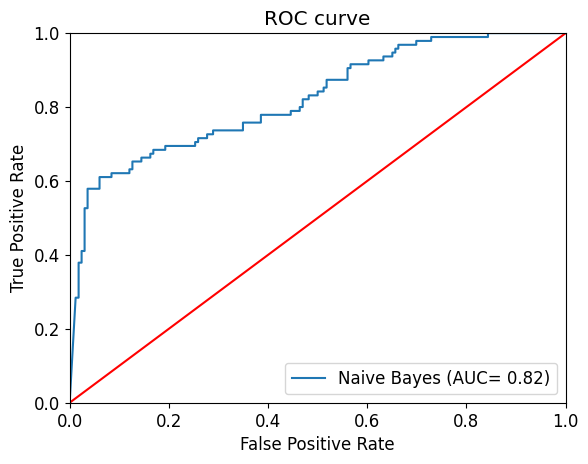

In [ ]:
y_pred_proba_nb = nb.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC= %.2f)' % (auc_nb))
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()

# Add threshold point
# threshold = 0.86
# idx = np.min(np.where(tpr > threshold))
# plt.scatter(fpr[idx], tpr[idx], marker='o', color='black', label='Threshold')


#**Learning curves for SCV and Naive Bayes**

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([nb, svm]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")


# **get labels back**

In [ ]:
pred_nb

In [ ]:
class_le.inverse_transform(pred_nb)


# **ROC curve for all**

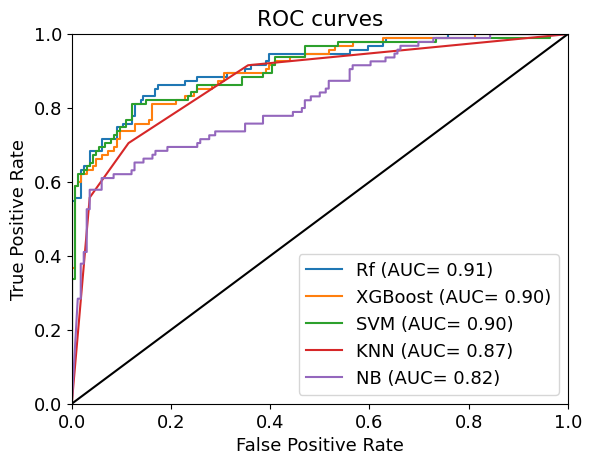

In [ ]:
plt.rcParams['font.size'] = 13

plt.plot(fpr_Rf, tpr_Rf, label='Rf (AUC= %.2f)' % (auc_Rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC= %.2f)' % (auc_xgb))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC= %.2f)' % (auc_svm))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC= %.2f)' % (auc_knn))
plt.plot(fpr_nb, tpr_nb, label='NB (AUC= %.2f)' % (auc_nb))
plt.plot([0, 1], [0, 1],'k')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend()
plt.savefig('ROC curves_1024.pdf')